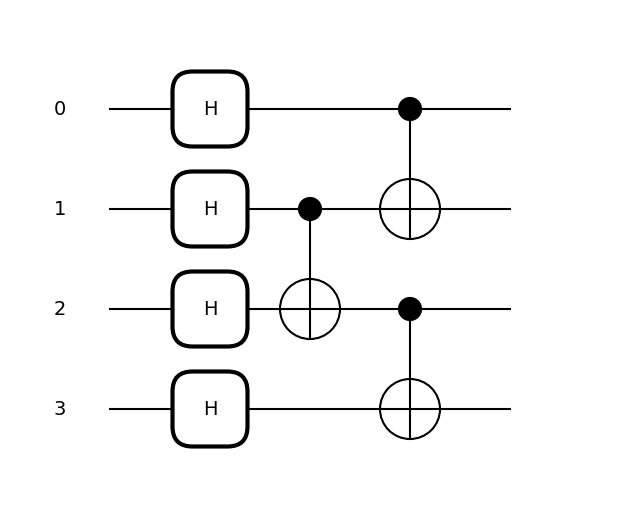

In [1]:
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt

def U_test():
    for i in range(4):
        qml.Hadamard(i)
    qml.CNOT((1, 2))
    qml.CNOT((2, 3))
    qml.CNOT((0, 1))

qml.draw_mpl(U_test)()
plt.show()

In [2]:
def V_0():
    qml.CNOT((0, 1))
    qml.CNOT((1, 2))
    qml.Hadamard(0)

dev = qml.device("default.qubit")

@qml.qnode(dev)
def local_inversion():
    U_test()   # some shallow unitary circuit
    V_0()      # supposed to disentangle qubit 0
    return qml.density_matrix(wires=[0])

print(np.allclose(local_inversion(), np.array([[1., 0.], [0., 0.]])))

True


In [3]:
def V_1():
    qml.CNOT((0, 1))
    qml.CNOT((1, 2))
    qml.Hadamard(1)

def V_2():
    qml.CNOT((2, 3))
    qml.CNOT((1, 2))
    qml.Hadamard(2)

def V_3():
    qml.CNOT((2, 3))
    qml.CNOT((1, 2))
    qml.Hadamard(3)

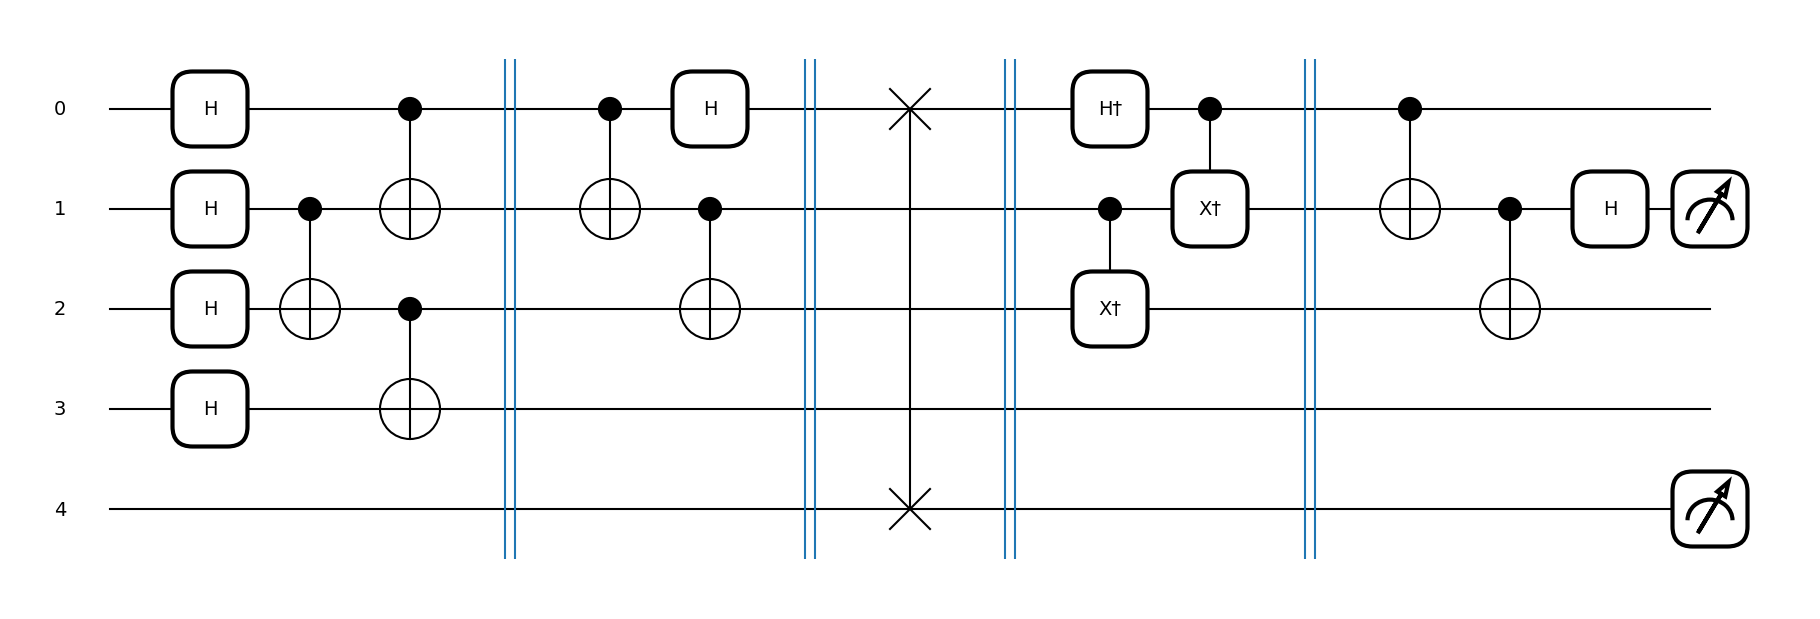

Sewing qubit 1
rho_1 = |0⟩⟨0| True
rho_0+n = |0⟩⟨0| True


In [4]:
n = 4 # number of qubits

@qml.qnode(dev)
def sewing_1():
    U_test()              # some shallow unitary circuit
    qml.Barrier()
    V_0()                 # disentangle qubit 0
    qml.Barrier()
    qml.SWAP((0, n))      # swap out disentangled qubit 0 and n+0
    qml.Barrier()
    qml.adjoint(V_0)()    # repair circuit from V_0
    qml.Barrier()
    V_1()                 # disentangle qubit 1
    return qml.density_matrix(wires=[1]), qml.density_matrix(wires=[n])

# The Barriers are to see which part of the circuit corresponds to which gate
qml.draw_mpl(sewing_1)()
plt.show()

r1, rn = sewing_1()
print(f"Sewing qubit 1")
print(f"rho_1 = |0⟩⟨0| {np.allclose(r1, np.array([[1, 0], [0, 0]]))}")
print(f"rho_0+n = |0⟩⟨0| {np.allclose(rn, np.array([[1, 0], [0, 0]]))}")

In [5]:
@qml.qnode(dev)
def sewing_2():
    U_test()              # some shallow unitary circuit
    V_0()                 # disentangle qubit 0
    qml.SWAP((0, n))      # swap out disentangled qubit 0 and n+0
    qml.adjoint(V_0)()    # repair circuit from V_0
    V_1()                 # disentangle qubit 1
    qml.SWAP((1, n + 1))  # swap out disentangled qubit 1 to n+1
    qml.adjoint(V_1)()    # repair circuit from V_1
    V_2()                 # disentangle qubit 2
    return qml.density_matrix(wires=[2]), qml.density_matrix(wires=[n]), qml.density_matrix(wires=[n + 1])

r2, rn, rn1 = sewing_2()
print(f"Sewing qubit 2")
print(f"rho_2 = |0⟩⟨0| {np.allclose(r2, np.array([[1, 0], [0, 0]]))}")
print(f"rho_0+n = |0⟩⟨0| {np.allclose(rn, np.array([[1, 0], [0, 0]]))}")
print(f"rho_1+n = |0⟩⟨0| {np.allclose(rn1, np.array([[1, 0], [0, 0]]))}")

Sewing qubit 2
rho_2 = |0⟩⟨0| True
rho_0+n = |0⟩⟨0| True
rho_1+n = |0⟩⟨0| True


In [6]:
@qml.qnode(dev)
def sewing_3():
    U_test()              # some shallow unitary circuit
    V_0()                 # disentangle qubit 0
    qml.SWAP((0, n))      # swap out disentangled qubit 0 and n+0
    qml.adjoint(V_0)()    # repair circuit from V_0
    V_1()                 # disentangle qubit 1
    qml.SWAP((1, n + 1))  # swap out disentangled qubit 1 to n+1
    qml.adjoint(V_1)()    # repair circuit from V_1
    V_2()                 # disentangle qubit 2
    qml.SWAP((2, n + 2))  # swap out disentangled qubit 2 to n+2
    qml.adjoint(V_2)()    # repair circuit from V_2
    V_3()                 # disentangle qubit 3
    return qml.density_matrix(wires=[3]), qml.density_matrix(wires=[n]), qml.density_matrix(wires=[n + 1]), qml.density_matrix(wires=[n + 2])

r3, rn, rn1, rn2 = sewing_3()
print(f"Sewing qubit 3")
print(f"rho_3 = |0⟩⟨0| {np.allclose(r3, np.array([[1, 0], [0, 0]]))}")
print(f"rho_0+n = |0⟩⟨0| {np.allclose(rn, np.array([[1, 0], [0, 0]]))}")
print(f"rho_1+n = |0⟩⟨0| {np.allclose(rn1, np.array([[1, 0], [0, 0]]))}")
print(f"rho_2+n = |0⟩⟨0| {np.allclose(rn2, np.array([[1, 0], [0, 0]]))}")

Sewing qubit 3
rho_3 = |0⟩⟨0| True
rho_0+n = |0⟩⟨0| True
rho_1+n = |0⟩⟨0| True
rho_2+n = |0⟩⟨0| True


In [7]:
@qml.qnode(dev)
def V_dagger_test():
    U_test()              # some shallow unitary circuit
    V_0()                 # disentangle qubit 0
    qml.SWAP((0, n))      # swap out disentangled qubit 0 and n+0
    qml.adjoint(V_0)()    # repair circuit from V_0
    V_1()                 # disentangle qubit 1
    qml.SWAP((1, n + 1))  # swap out disentangled qubit 1 to n+1
    qml.adjoint(V_1)()    # repair circuit from V_1
    V_2()                 # disentangle qubit 2
    qml.SWAP((2, n + 2))  # swap out disentangled qubit 2 to n+2
    qml.adjoint(V_2)()    # repair circuit from V_2
    V_3()                 # disentangle qubit 3
    qml.SWAP((3, n + 3))  # swap out disentangled qubit 3 to n+3
    qml.adjoint(V_3)()    # repair circuit from V_3
    for i in range(n):    # swap back all decoupled wires to their original registers
        qml.SWAP((i + n, i))
    return qml.density_matrix([0, 1, 2, 3])

psi0 = np.eye(2**4)[0] # |0>^n
np.allclose(V_dagger_test(), np.outer(psi0, psi0))

True

In [9]:
np.outer(psi0, psi0)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [10]:
def V_dagger():
    V_0()                 # disentangle qubit 0
    qml.SWAP((0, n))      # swap out disentangled qubit 0 and n+0
    qml.adjoint(V_0)()    # repair circuit from V_0
    V_1()                 # disentangle qubit 1
    qml.SWAP((1, n + 1))  # swap out disentangled qubit 1 to n+1
    qml.adjoint(V_1)()    # repair circuit from V_1
    V_2()                 # disentangle qubit 2
    qml.SWAP((2, n + 2))  # swap out disentangled qubit 2 to n+2
    qml.adjoint(V_2)()    # repair circuit from V_2
    V_3()                 # disentangle qubit 3
    qml.SWAP((3, n + 3))  # swap out disentangled qubit 3 to n+3
    qml.adjoint(V_3)()    # repair circuit from V_3
    for i in range(n):    # swap back all decoupled wires to their original registers
        qml.SWAP((i + n, i))

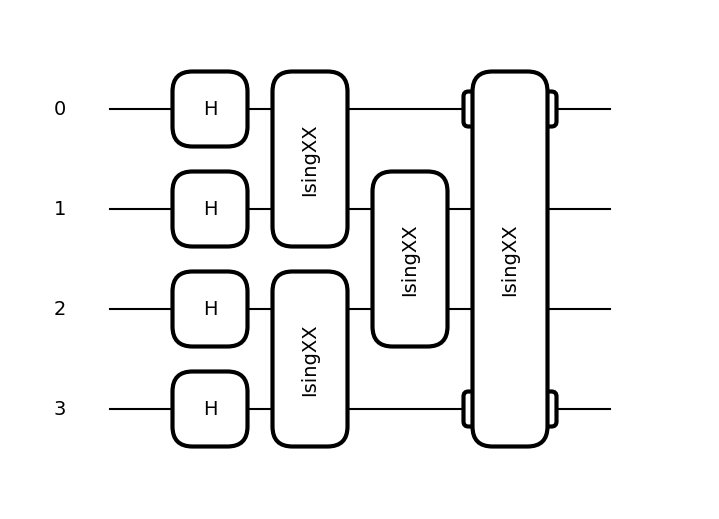

In [11]:
import jax
jax.config.update("jax_enable_x64", True)
jax.config.update("jax_platform_name", "cpu")

n = 4
wires = range(n)
U_params = jax.random.normal(jax.random.PRNGKey(0), shape=(2, n//2), dtype=float)

def U_target(wires):
    for i in range(n):
        qml.Hadamard(wires=wires[i])
    # brick-wall ansatz
    for i in range(0, n, 2):
        qml.IsingXX(U_params[0, i], wires=(wires[i], wires[(i+1)%len(wires)]))
    for i in range(1, n, 2):
        qml.IsingXX(U_params[1, i], wires=(wires[i], wires[(i+1)%len(wires)]))

qml.draw_mpl(U_target)(wires)
plt.show()

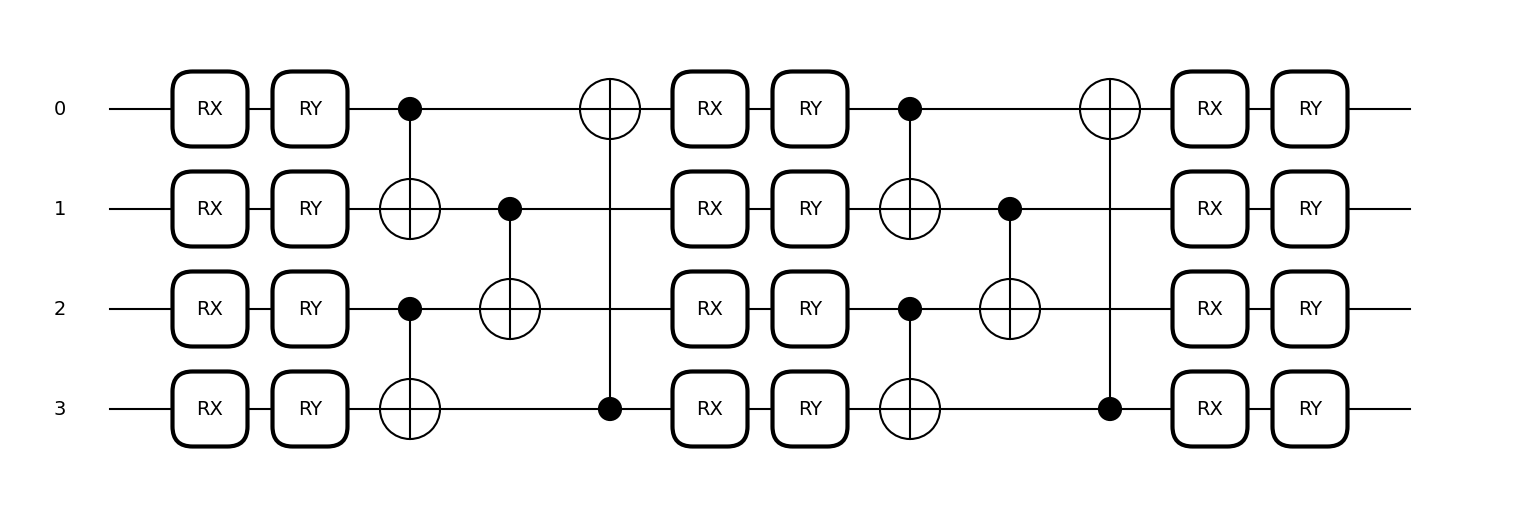

In [12]:
n_layers = 2

def V_i(params, wires):

    for i in range(n):
        qml.RX(params[0, 0, i], i)
    for i in range(n):
        qml.RY(params[0, 1, i], i)

    for ll in range(n_layers):
        for i in range(0, n, 2):
            qml.CNOT((wires[i], wires[i+1]))
        for i in range(1, n, 2):
            qml.CNOT((wires[i], wires[(i+1)%n]))
        for i in range(n):
            qml.RX(params[ll+1, 0, i], i)
        for i in range(n):
            qml.RY(params[ll+1, 1, i], i)

params = jax.random.normal(jax.random.PRNGKey(10), shape=(n_layers+1, 2, n), dtype=float)

qml.draw_mpl(V_i)(params, wires)
plt.show()

In [14]:
import optax
from datetime import datetime
from functools import partial

X, Y, Z = qml.PauliX, qml.PauliY, qml.PauliZ

def run_opt(value_and_grad, theta, n_epochs=100, lr=0.1, b1=0.9, b2=0.999):

    optimizer = optax.adam(learning_rate=lr, b1=b1, b2=b2)
    opt_state = optimizer.init(theta)

    energy = np.zeros(n_epochs)
    thetas = []

    @jax.jit
    def step(opt_state, theta):
        val, grad_circuit = value_and_grad(theta)
        updates, opt_state = optimizer.update(grad_circuit, opt_state)
        theta = optax.apply_updates(theta, updates)

        return opt_state, theta, val

    t0 = datetime.now()
    ## Optimization loop
    for n in range(n_epochs):
        opt_state, theta, val = step(opt_state, theta)

        energy[n] = val
        thetas.append(
            theta
        )
    t1 = datetime.now()
    print(f"final loss: {val}; min loss: {np.min(energy)}; after {t1 - t0}")

    return thetas, energy

dev = qml.device("default.qubit")

In [15]:
@qml.qnode(dev, interface="jax")
def qnode_i(params, i):
    U_target(wires)
    V_i(params, wires)
    return [qml.expval(P(i)) for P in [X, Y, Z]]

@partial(jax.jit, static_argnums=1)
@jax.value_and_grad
def cost_i(params, i):
    x, y, z = qnode_i(params, i)
    return x**2 + y**2 + (1-z)**2

In [16]:
params_i = []
for i in range(n):
    cost = partial(cost_i, i=i)
    thetas, _ = run_opt(cost, params)
    params_i.append(thetas[-1])

final loss: 4.168309870147916e-05; min loss: 4.168309870147916e-05; after 0:00:02.605204
final loss: 4.426389047113097e-06; min loss: 4.426389047113097e-06; after 0:00:02.720140
final loss: 7.119522980853726e-06; min loss: 6.622691688627871e-06; after 0:00:03.041826
final loss: 3.7957338559137796e-06; min loss: 3.4988574855753555e-06; after 0:00:02.639058


In [17]:
for i in range(n):
    X_res, Y_res, Z_res = qnode_i(params_i[i], i)
    print(f"Bloch sphere coordinates of qubit {i} after inversion: {X_res:.5f}, {Y_res:.5f} {Z_res:.5f}")

Bloch sphere coordinates of qubit 0 after inversion: -0.00183, -0.00021 0.99393
Bloch sphere coordinates of qubit 1 after inversion: -0.00016, 0.00015 0.99795
Bloch sphere coordinates of qubit 2 after inversion: -0.00085, 0.00013 0.99753
Bloch sphere coordinates of qubit 3 after inversion: 0.00062, 0.00044 0.99837


In [18]:
def V_sew():
    for i in range(n):
        # local sewing: inversion, exchange, heal
        V_i(params_i[i], range(n))
        qml.SWAP((i, i+n))
        qml.adjoint(V_i)(params_i[i], range(n))

    # global SWAP
    for i in range(n):
        qml.SWAP((i, i+n))

@qml.qnode(dev, interface="jax")
def sewing_test():
    U_target(range(n))
    V_sew()
    return qml.density_matrix(range(4))

print(np.allclose(sewing_test(), np.outer(psi0, psi0), atol=1e-1))

True
